In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical

from IPython.display import display
import random
import matplotlib.pyplot as plt
random.seed(10)

In [8]:
# Import Data
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])


all_games = pd.read_csv(games_folder_path + 'games_sorted.csv', index_col=False, parse_dates=['date'])

C:\Users\Craig\AppData\Local\Temp\ipykernel_14208\3458396436.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])


In [9]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)

    all_teams = np.vstack([home_teams, away_teams]).T
 
    oneHot = OneHotEncoder()
    X_teams = oneHot.fit_transform(all_teams).todense()
    X_teams = pd.DataFrame(X_teams)
    games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

all_games = OHE_Teams(all_games)

In [10]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    venues = venues.reshape(-1,1)
    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

all_games = OHE_Venues(all_games)

In [11]:

y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']
y_true = all_games['homeWin']

drop_values = ['gameId', 'venue', 'homeWin', 'homeTeam', 'awayTeam', 'year','date','startTime', 'attendance', 'homeTeamScore', 'awayTeamScore', 'round']

def set_columns(game_list):
    game_list = game_list.drop(drop_values,axis=1)
    game_list.columns = game_list.columns.astype(str)
    return game_list

games_2012 = set_columns(games_2012)
games_2013 = set_columns(games_2013)
games_2014 = set_columns(games_2014)
games_2015 = set_columns(games_2015)
games_2016 = set_columns(games_2016)
games_2017 = set_columns(games_2017)
games_2018 = set_columns(games_2018)
games_2019 = set_columns(games_2019)
games_2020 = set_columns(games_2020)
games_2021 = set_columns(games_2021)

all_games = set_columns(all_games)

In [12]:
games_2012

,rainfall,homeTeamLastWin,awayTeamLastWin,awayTravel,homeTravel,homeTeamChanges,awayTeamChanges,homeGameDifference,awayGameDifference,homeTeamImportanceDifference,...,Marrara Oval,Perth Stadium,Riverway Stadium,S.C.G.,Stadium Australia,Subiaco,Sydney Showground,Traeger Park,Wellington,York Park
0,0.0,0,0,0,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0,0,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0,0,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6,0,0,0,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0,3,0,0,0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,0,1,3,0,2,1,-12,76,16.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,2.0,0,1,4,0,2,1,98,-13,0.838972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,1,1,2,0,1,1,-9,189,5.209110,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
205,1.0,1,1,2,0,2,1,-7,-33,-2.069967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
games_2012 = scaler.fit_transform(games_2012)
games_2013 = scaler.fit_transform(games_2013)
games_2014 = scaler.fit_transform(games_2014)
games_2015 = scaler.fit_transform(games_2015)
games_2016 = scaler.fit_transform(games_2016)
games_2017 = scaler.fit_transform(games_2017)
games_2018 = scaler.fit_transform(games_2018)
games_2019 = scaler.fit_transform(games_2019)
games_2020 = scaler.fit_transform(games_2020)
games_2021 = scaler.fit_transform(games_2021)

all_games = scaler.fit_transform(all_games)

In [14]:
x_train_2012 = games_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = games_2012[171:]
y_valid_2012 = y_true_2012[171:]

x_train_2013 = games_2013[:171]
y_train_2013 = y_true_2013[:171]
x_valid_2013 = games_2013[171:]
y_valid_2013 = y_true_2013[171:]

x_train_2014 = games_2014[:171]
y_train_2014 = y_true_2014[:171]
x_valid_2014 = games_2014[171:]
y_valid_2014 = y_true_2014[171:]

x_train_2015 = games_2015[:170]
y_train_2015 = y_true_2015[:170]
x_valid_2015 = games_2015[170:]
y_valid_2015 = y_true_2015[170:]

x_train_2016 = games_2016[:171]
y_train_2016 = y_true_2016[:171]
x_valid_2016 = games_2016[171:]
y_valid_2016 = y_true_2016[171:]

x_train_2017 = games_2017[:171]
y_train_2017 = y_true_2017[:171]
x_valid_2017 = games_2017[171:]
y_valid_2017 = y_true_2017[171:]

x_train_2018 = games_2018[:171]
y_train_2018 = y_true_2018[:171]
x_valid_2018 = games_2018[171:]
y_valid_2018 = y_true_2018[171:]

x_train_2019 = games_2019[:171]
y_train_2019 = y_true_2019[:171]
x_valid_2019 = games_2019[171:]
y_valid_2019 = y_true_2019[171:]

x_train_2020 = games_2020[:127]
y_train_2020 = y_true_2020[:127]
x_valid_2020 = games_2020[127:]
y_valid_2020 = y_true_2020[127:]

x_train_2021 = games_2021[:171]
y_train_2021 = y_true_2021[:171]
x_valid_2021 = games_2021[171:]
y_valid_2021 = y_true_2021[171:]

x_train = all_games[:1447]
y_train = y_true[:1447]
x_valid = all_games[1447:1655]
y_valid = y_true[1447:1655]

In [15]:
# OHE Y values
oneHot = OneHotEncoder()
def OHE_y_values(y_val):
    y = np.vstack([y_val]).T
    
    for i in range(len(y)):
        if y[i] == 1:
            y[i] = 0

    y_OHE = oneHot.fit_transform(y).toarray()

    return y_OHE


y_train_2012_OHE = OHE_y_values(y_train_2012)
y_valid_2012_OHE = OHE_y_values(y_valid_2012)

y_train_2013_OHE = OHE_y_values(y_train_2013)
y_valid_2013_OHE = OHE_y_values(y_valid_2013)

y_train_2014_OHE = OHE_y_values(y_train_2014)
y_valid_2014_OHE = OHE_y_values(y_valid_2014)

y_train_2015_OHE = OHE_y_values(y_train_2015)
y_valid_2015_OHE = OHE_y_values(y_valid_2015)

y_train_2016_OHE = OHE_y_values(y_train_2016)
y_valid_2016_OHE = OHE_y_values(y_valid_2016)

y_train_2017_OHE = OHE_y_values(y_train_2017)
y_valid_2017_OHE = OHE_y_values(y_valid_2017)

y_train_2018_OHE = OHE_y_values(y_train_2018)
y_valid_2018_OHE = OHE_y_values(y_valid_2018)

y_train_2019_OHE = OHE_y_values(y_train_2019)
y_valid_2019_OHE = OHE_y_values(y_valid_2019)

y_train_2020_OHE = OHE_y_values(y_train_2020)
y_valid_2020_OHE = OHE_y_values(y_valid_2020)

y_train_2021_OHE = OHE_y_values(y_train_2021)
y_valid_2021_OHE = OHE_y_values(y_valid_2021)

y_train_OHE = OHE_y_values(y_train)
y_valid_OHE = OHE_y_values(y_valid)




In [24]:
print(x_train_2012.shape)
d_Train = x_train_2012.reshape(171, 1, 86)
d_valid = x_valid_2012.reshape(36, 1, 86) 

(171, 86)


array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.00520833, 0.        , 0.        , ..., 0.        ,
         0.        , 1.        ]],

       [[0.015625  , 1.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.015625  , 0.        , 1.        , ..., 0.        ,
         0.        , 0.        ]]])

In [25]:
y_valid_2012_OHE.shape
d_y_t = y_train_2012_OHE.reshape(171, 1,2)
d_y_v = y_valid_2012_OHE.reshape(36, 1, 2)

In [36]:
e = Embedding(2, 2, input_length= 78)

In [40]:
def train_model( xTrain, yTrain, xValid , yValid):
    model = Sequential()
    #model.add(e)
    model.add(LSTM( 128 ,input_shape = (86,1),activation = 'tanh' , dropout = 0.25, recurrent_dropout = 0.25, return_sequences=True))
    model.add(LSTM( 64, return_sequences=True ))
    model.add(LSTM( 32 ))
    model.add(Dense(2))
    model.build()
    model.summary()
    model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )
    early_stopper = EarlyStopping( monitor = 'val_accuracy' , min_delta = 0.0001 )
    reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', patience=2, cooldown=0 )
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 10, shuffle=False, validation_split= 0.2, callbacks=callbacks)

    # train_history = model.fit( x_train_2012 , y_train_2012 , epochs = 10, validation_split = 0.1 , verbose = 1 )
    score = model.evaluate( xValid , yValid )

    print( f"Train Accuracy: {train_history}" )
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )


In [41]:
train_model(x_train, y_train_OHE, x_valid, y_valid_OHE)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 86, 128)           66560     
                                                                 
 lstm_24 (LSTM)              (None, 86, 64)            49408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 128,450
Trainable params: 128,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
37/37 [==============================] - 21s 317ms/step - loss: 0.9976 - accuracy: 0.4935 - val_loss: 0.6931 - val_accuracy: 0.5655 - lr: 0.0010
Epoch 2/10
37/37 [======

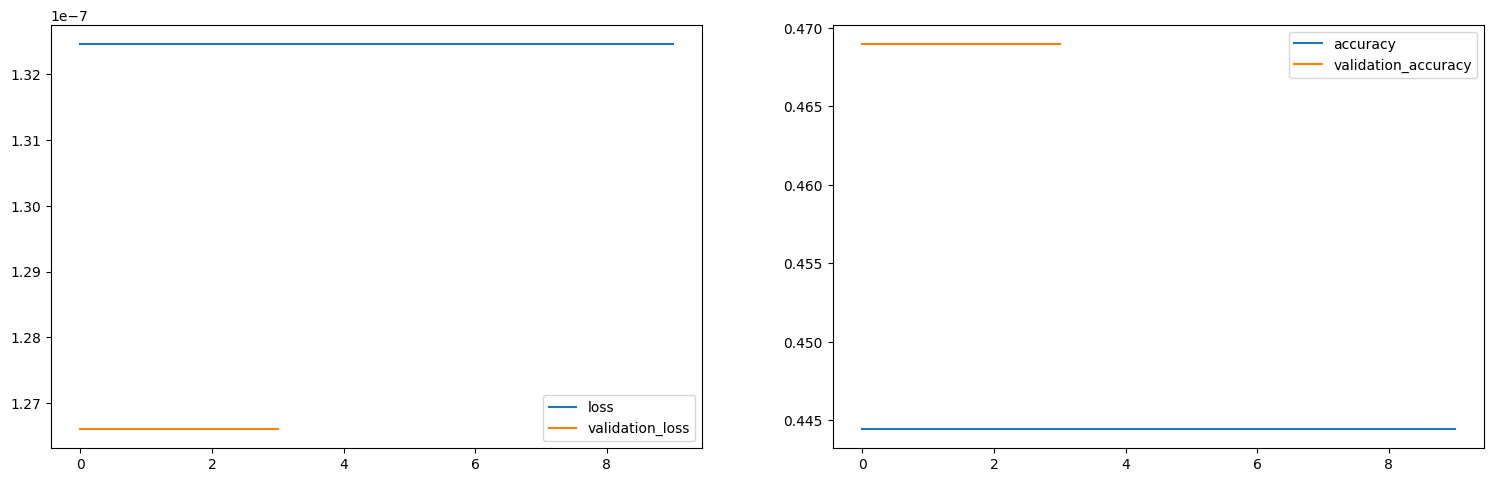

In [57]:
loss = train_history.history['loss']
# validation_loss = train_history.history['val_loss']
accuracy = train_history.history['accuracy']
# val_accuracy = train_history.history['val_accuracy']

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(validation_loss)
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [84]:
from tensorflow import keras
# from tensorflow.keras import layers

layers = keras.layers
def get_lstm_model(featureSize):
	# input for variable-length sequences of integers
	inputs = keras.Input(shape=(None,), dtype="int32")
	# embed the tokens in a 128-dimensional vector with masking
	# applied and apply dropout
	x = layers.Embedding(featureSize, 128, mask_zero=True)(inputs)
	x = layers.Dropout(0.2)(x)
	# add 3 LSTMs
	x = layers.LSTM(64, return_sequences=True)(x)
	x = layers.LSTM(64, return_sequences=True)(x)
	x = layers.LSTM(64)(x)
	# add a classifier head
	x = layers.Dense(units=64, activation="relu")(x)
	x = layers.Dense(units=32, activation="relu")(x)
	x = layers.Dropout(0.2)(x)
	outputs = layers.Dense(1, activation="sigmoid")(x)
	
	# build the LSTM model
	model = keras.Model(inputs, outputs, name="LSTM")
	
	# return the LSTM model
	return model

In [163]:
# get the LSTM model and compile it
print("[INFO] building the LSTM model...")
modelLSTM = get_lstm_model(featureSize=55)
modelLSTM.compile(metrics=["accuracy"],
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	loss=keras.losses.CategoricalCrossentropy(from_logits=False),
)
# train the LSTM model
print("[INFO] training the LSTM model...")
historyLSTM = modelLSTM.fit(x_train_2012['value'] , epochs=5,
	validation_data=x_valid_2012['value'] , 
)

[INFO] building the LSTM model...
[INFO] training the LSTM model...


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [110]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(78,), activation='sigmoid'))
    model.add(Dense(30, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, x_train_2012, y_train_2012, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 65.39% (12.60%)
